<a href="https://colab.research.google.com/github/Isra1107/Estadistica-Multivariada-IGR/blob/main/MPT_Opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yahoo_fin
!pip install yahoo_fin --upgrade
!pip install pandas_datareader

import yahoo_fin as yfin
import yahoo_fin.stock_info as si
import pandas as pd
import numpy as np
from datetime import datetime
import statistics
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pandas_datareader import data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 3.9 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6049 sha256=7a0c1314f6d79f8980348de3809d94075332c821f004a62ac6507dd67b7224ac
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


In [ ]:
#EXTRAEMOS DE YAHOO FINANCE LOS DATOS HISTORICOS DE LAS ACCIONES QUE VAN A CONFORMAR EL PORTAFOLIO
IBM_s_t = si.get_data("IBM", start_date = "11/28/2018", end_date = "11/28/2023")
AMZN_s_t = si.get_data("AMZN", start_date = "11/28/2018", end_date = "11/28/2023")
AAPL_s_t = si.get_data("AAPL", start_date = "11/28/2018", end_date = "11/28/2023")
MSFT_s_t = si.get_data("MSFT", start_date = "11/28/2018", end_date = "11/28/2023")
TSLA_s_t = si.get_data("TSLA", start_date = "11/28/2018", end_date = "11/28/2023")
ORCL_s_t = si.get_data("ORCL", start_date = "11/28/2018", end_date = "11/28/2023")
JNJ_s_t = si.get_data("JNJ", start_date = "11/28/2018", end_date = "11/28/2023")
GM_s_t = si.get_data("GM", start_date = "11/28/2018", end_date = "11/28/2023")
BABA_s_t = si.get_data("BABA", start_date = "11/28/2018", end_date = "11/28/2023")

In [ ]:
#CREAMOS UNA TABLA CON LOS PRECIOS DE CIERRE AJUSTADOS DE CADA ACCIÓN
portafolio = pd.concat([IBM_s_t["adjclose"],AMZN_s_t["adjclose"],AAPL_s_t["adjclose"],MSFT_s_t["adjclose"],TSLA_s_t["adjclose"],ORCL_s_t["adjclose"],JNJ_s_t["adjclose"],GM_s_t["adjclose"],BABA_s_t["adjclose"]], axis=1)
portafolio.columns = ["IBM","AMZN","AAPL","MSFT","TSLA","ORCL","JNJ","GM","BABA"]
portafolio.head()

,IBM,AMZN,AAPL,MSFT,TSLA,ORCL,JNJ,GM,BABA
2018-11-28,90.407806,83.887497,43.302971,105.134834,23.191334,44.085964,126.939674,34.044521,157.226456
2018-11-29,89.290581,83.678497,42.970322,104.254929,22.744667,43.820667,126.428253,33.869453,154.207047
2018-11-30,91.341286,84.508499,42.738182,104.917229,23.365334,44.607414,127.338371,34.965889,158.726303
2018-12-03,92.105728,88.617996,44.231556,106.052582,23.899332,45.586304,126.740326,35.426567,161.568100
2018-12-04,89.378777,83.419998,42.285854,102.674858,23.980000,44.598274,126.584267,33.648327,156.239716


<Axes: >

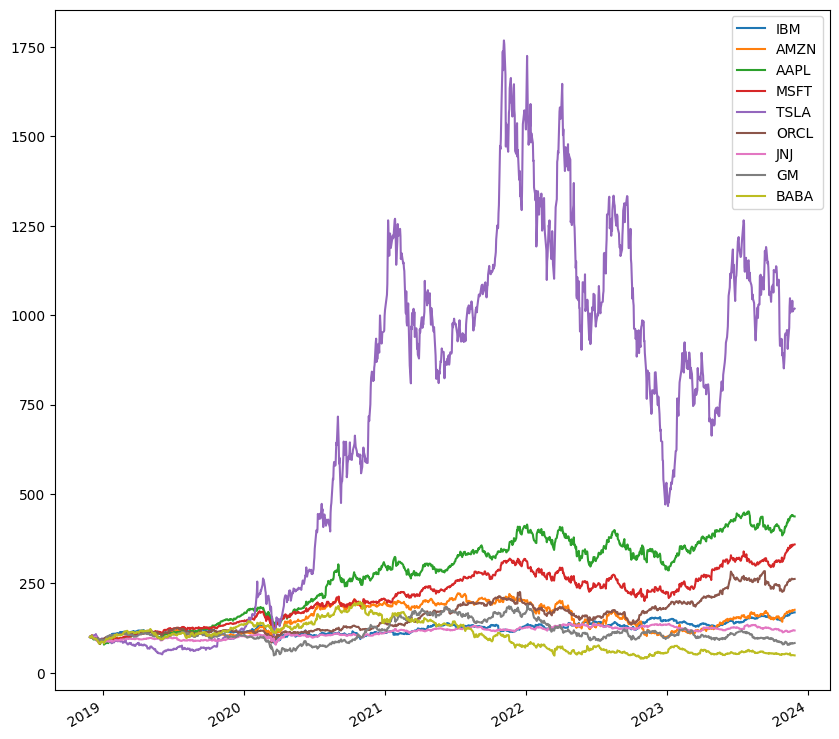

In [ ]:
(portafolio/portafolio.iloc[0]*100).plot(figsize=(10,10))   #Son series de tiempo - Suavizado exponencial del adj close

In [ ]:
list_portafolio = ["IBM","AMZN","AAPL","MSFT","TSLA","ORCL","JNJ","GM","BABA"]

In [ ]:
def calcular_retornos(portafolio):
    return portafolio.pct_change()

In [ ]:
retornos = calcular_retornos(portafolio)
retornos.dropna()
retornos.sum()

IBM     0.700022
AMZN    0.887528
AAPL    1.741913
MSFT    1.516144
TSLA    3.378591
ORCL    1.193576
JNJ     0.272882
GM      0.258661
BABA   -0.144784
dtype: float64

In [ ]:
retornos

,IBM,AMZN,AAPL,MSFT,TSLA,ORCL,JNJ,GM,BABA
2018-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-29,-0.012358,-0.002491,-0.007682,-0.008369,-0.019260,-0.006018,-0.004029,-0.005142,-0.019204
2018-11-30,0.022967,0.009919,-0.005402,0.006353,0.027288,0.017954,0.007199,0.032372,0.029306
2018-12-03,0.008369,0.048628,0.034942,0.010821,0.022854,0.021945,-0.004697,0.013175,0.017904
2018-12-04,-0.029607,-0.058656,-0.043989,-0.031850,0.003375,-0.021674,-0.001231,-0.050195,-0.032979
...,...,...,...,...,...,...,...,...,...
2023-11-20,0.009549,0.006544,0.009278,0.020522,0.005548,0.013523,0.008816,0.017481,0.011083
2023-11-21,-0.002851,-0.015260,-0.004231,-0.011578,0.023769,-0.007184,0.008071,-0.021739,0.006118
2023-11-22,0.007927,0.019528,0.003514,0.012813,-0.028980,0.001378,-0.001985,0.007168,0.000253
2023-11-24,0.000322,0.000204,-0.007004,-0.001112,0.005294,0.000086,0.011139,0.002847,-0.005952


In [ ]:
def retornos_log(portafolio):
  return np.log(portafolio) - np.log(portafolio.shift(1))

In [ ]:
log_retornos = retornos_log(portafolio)
log_retornos = log_retornos.dropna()
log_retornos.sum()

IBM     0.523812
AMZN    0.565910
AAPL    1.475066
MSFT    1.277613
TSLA    2.320392
ORCL    0.964403
JNJ     0.167856
GM     -0.183575
BABA   -0.720375
dtype: float64

In [ ]:
#PROMEDIO DE LOS RETORNOS

In [ ]:
log_retornos

,IBM,AMZN,AAPL,MSFT,TSLA,ORCL,JNJ,GM,BABA
2018-11-29,-0.012435,-0.002495,-0.007712,-0.008405,-0.019448,-0.006036,-0.004037,-0.005156,-0.019391
2018-11-30,0.022707,0.009870,-0.005417,0.006333,0.026923,0.017795,0.007173,0.031859,0.028885
2018-12-03,0.008334,0.047483,0.034346,0.010763,0.022597,0.021707,-0.004708,0.013089,0.017745
2018-12-04,-0.030054,-0.060447,-0.044986,-0.032368,0.003370,-0.021912,-0.001232,-0.051499,-0.033535
2018-12-06,0.018819,0.018287,-0.011212,0.006155,0.009298,-0.043389,-0.000822,-0.012249,-0.015979
...,...,...,...,...,...,...,...,...,...
2023-11-20,0.009504,0.006522,0.009235,0.020314,0.005533,0.013432,0.008777,0.017330,0.011022
2023-11-21,-0.002855,-0.015378,-0.004240,-0.011646,0.023491,-0.007210,0.008039,-0.021979,0.006099
2023-11-22,0.007895,0.019339,0.003508,0.012731,-0.029408,0.001377,-0.001987,0.007143,0.000253
2023-11-24,0.000322,0.000204,-0.007029,-0.001112,0.005280,0.000086,0.011078,0.002843,-0.005970


<Axes: >

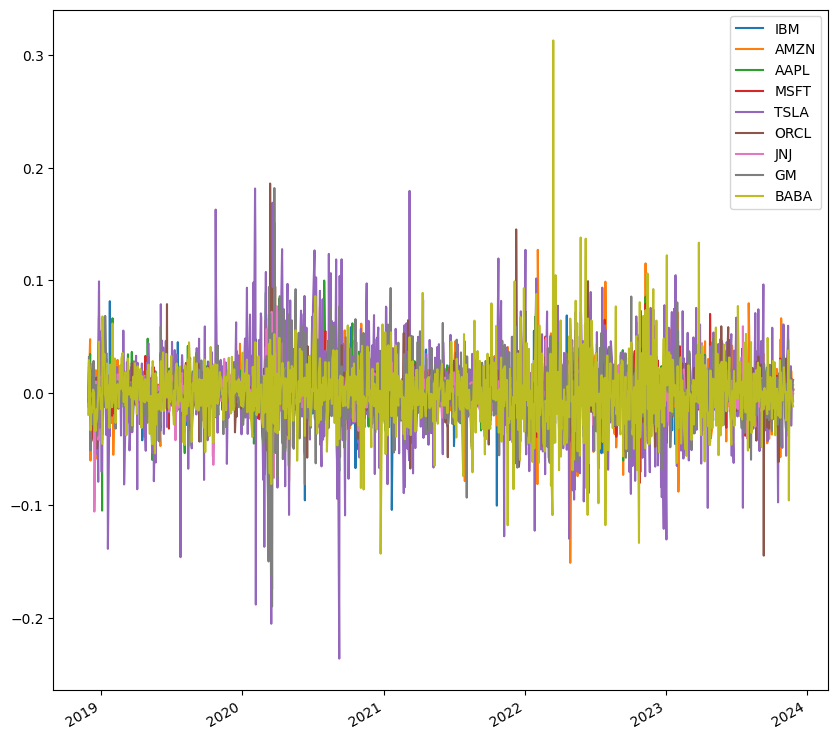

In [ ]:
log_retornos.plot(figsize=(10,10))    #Log-rendimientos tienen distribución gaussiana

In [ ]:
#ASIGNACIÓN DE PESOS DE MANERA ALEATORIA
num_stocks = len(list_portafolio)
random_array = np.random.random(num_stocks)

In [ ]:
#DEFINIMOS QUE LA SUMA DE LOS PESOS DEBEN DAR 1
pesos = np.random.random(num_stocks)
pesos /= np.sum(pesos)

In [ ]:
pesos

array([0.14145895, 0.02576148, 0.10305222, 0.15267186, 0.12986368,
       0.24672229, 0.00098307, 0.08399764, 0.11548881])

In [ ]:
#CALCULO DEL RETORNO
np.sum(pesos*log_retornos.mean())*250 #250 sesiones en un año

0.17447555511056542

In [ ]:
#CALCULO DE VARIANZA
varianza = np.dot(pesos.T,np.dot(log_retornos.cov()*250,pesos)) #haciendo uso del producto punto


In [ ]:
volatilidad = np.sqrt(varianza)
volatilidad

0.26235569680434295

In [ ]:
#SIMULACIONES

retornos_portafolio = []
volatilidades_portafolio = []
for x in range (1000):
  pesos = np.random.random(num_stocks)
  pesos /= np.sum(pesos)
  retornos_portafolio.append(np.sum(pesos*log_retornos.mean())*250)
  volatilidades_portafolio.append(np.sqrt(np.dot(pesos.T,np.dot(log_retornos.cov()*250,pesos))))

In [ ]:
retornos_portafolio = np.array(retornos_portafolio)
volatilidades_portafolio = np.array(volatilidades_portafolio)
portafolios2 = pd.DataFrame({"Retorno":retornos_portafolio,"Volatilidad":volatilidades_portafolio})
portafolios2.tail()

,Retorno,Volatilidad
995,0.182255,0.243558
996,0.136498,0.244173
997,0.121213,0.288463
998,0.148181,0.234117
999,0.142742,0.242317


Text(0, 0.5, 'Retorno')

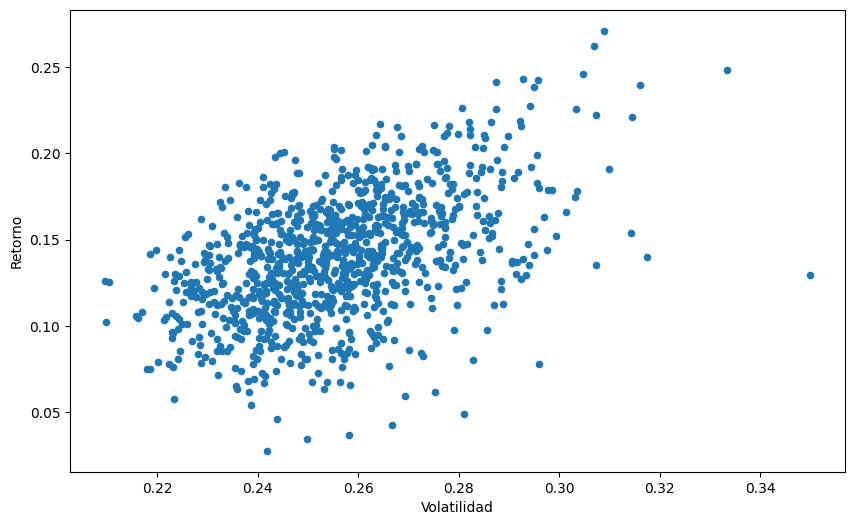

In [ ]:
#Graficamos la frontera eficiente

portafolios2.plot(x="Volatilidad",y="Retorno",kind="scatter",figsize=(10,6))
plt.xlabel("Volatilidad")
plt.ylabel("Retorno")

In [ ]:
#Calculamos los retornos esperados

RetornosE = pd.DataFrame(log_retornos.mean()) #obtenemos el promedio de cada acción
RetornosE

,0
IBM,0.000417
AMZN,0.000451
AAPL,0.001174
MSFT,0.001017
TSLA,0.001847
ORCL,0.000768
JNJ,0.000134
GM,-0.000146
BABA,-0.000574


In [ ]:
#Calculamos el riesgo individual

RiesgoI = pd.DataFrame(log_retornos.std()) #obtenemos la desviación estandar de cada acción
RiesgoI

,0
IBM,0.016781
AMZN,0.022634
AAPL,0.020590
MSFT,0.019473
TSLA,0.041037
ORCL,0.019053
JNJ,0.012946
GM,0.026573
BABA,0.030126


In [ ]:
#Realizamos la matriz de varianza y covarianza

datacov = log_retornos.select_dtypes(include=["float64","int"])
corr_matrix = datacov.corr(method="pearson")
corr_matrix

,IBM,AMZN,AAPL,MSFT,TSLA,ORCL,JNJ,GM,BABA
IBM,1.000000,0.299769,0.449281,0.455849,0.206164,0.497549,0.485668,0.473621,0.204650
AMZN,0.299769,1.000000,0.631653,0.691038,0.442187,0.413915,0.245076,0.322928,0.361822
AAPL,0.449281,0.631653,1.000000,0.765467,0.497748,0.526108,0.409782,0.429307,0.379628
MSFT,0.455849,0.691038,0.765467,1.000000,0.466137,0.587777,0.425738,0.422988,0.352723
TSLA,0.206164,0.442187,0.497748,0.466137,1.000000,0.244355,0.122685,0.377731,0.325805
ORCL,0.497549,0.413915,0.526108,0.587777,0.244355,1.000000,0.409268,0.404700,0.260783
JNJ,0.485668,0.245076,0.409782,0.425738,0.122685,0.409268,1.000000,0.258214,0.139443
GM,0.473621,0.322928,0.429307,0.422988,0.377731,0.404700,0.258214,1.000000,0.316858
BABA,0.204650,0.361822,0.379628,0.352723,0.325805,0.260783,0.139443,0.316858,1.000000


In [ ]:
#CALCULAMOS EL RENDIMIENTO ESPERADO DEL PORTAFOLIO

pesos = np.random.random(9) #Asignamos pesos aleatorios a cada acción
pesos /= np.sum(pesos)
pesos

array([0.13481153, 0.23782806, 0.14581014, 0.0085138 , 0.12790257,
       0.02916996, 0.05639641, 0.0494299 , 0.21013762])

In [ ]:
RetE = RetornosE.iloc[:, 0].values
print(RetE)

[ 0.00041705  0.00045057  0.00117442  0.00101721  0.00184745  0.00076784
  0.00013364 -0.00014616 -0.00057355]


In [ ]:
np.matmul(pesos,RetE) #Rendimiento esperado del portafolio

0.00048176128507945867

In [ ]:
#CALCULAMOS LA VARIANZA DEL PORTAFOLIO

transpesos = pesos.transpose()
SxW = np.dot(corr_matrix, transpesos)
VARP = np.matmul(pesos,SxW)
VARP

0.4742790864908529

In [ ]:
#CALCULAMOS EL RIESGO INDIVIDUAL DEL PORTAFOLIO
RIP = np.sqrt(VARP)
RIP

0.6886792333814437

In [ ]:
#INSTALAMOS LA PAQUETERÍA PyPortfolioOpt y las funciones para resolver problemas de frontera eficiente
!pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.6 MB/s eta 0:00:00


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier

In [ ]:
#Usamos la función EfficientFrontier para calcular los portafolios óptimos, con la condición de que los pesos deben
#ser positivos
ef = EfficientFrontier(RetE,corr_matrix,weight_bounds=(0,1))
#Obtenemos los pesos que nos generen la mínima volatilidad
w = ef.min_volatility()
c_w = ef.clean_weights()
c_w

OrderedDict([('IBM', 0.09856),
             ('AMZN', 0.09636),
             ('AAPL', 0.0),
             ('MSFT', 0.0),
             ('TSLA', 0.19151),
             ('ORCL', 0.08677),
             ('JNJ', 0.22249),
             ('GM', 0.09974),
             ('BABA', 0.20457)])